#Space Objects Analysis Part 2
### Author: Luiz Felipe Demétrio
***


## Objective:
Apply the knowledge acquired during the course to explore the region of a space object using data from the Dark Energy Survey (DES).


# PROJECT

## Libraries

In [33]:
# LIBRARIES
import matplotlib.pyplot as plt  # For plotting
import pandas as pd
import numpy as np

# !pip install astropy # (execute if astropy is not installed - the "!" symbol allows pip to be used within the Jupyter notebook environment)
from astropy import units as u
from astropy.coordinates import SkyCoord

# !pip install dblinea # (execute if dblinea is not installed)
from dblinea import DBBase

%reload_ext autoreload
%autoreload 2


## Reading the CSV file

Let's now read and discuss the previously created CSV file.

In [34]:
# Reading the CSV file with data (Rectangle)
data1 = pd.read_csv("Dados_CartwheelGalaxyRectangle.csv")

# Displaying the first rows of the file
data1.head()  # First 5 rows of data only


,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083233115,8.903303,-34.192051,2,17.879395,16.674522,16.257225,0.000783,0.000364,0.000379
1,1083233647,8.902043,-34.189657,0,25.366838,24.550381,24.269382,0.250888,0.159499,0.230430
2,1083233351,8.905861,-34.186896,0,24.855618,24.986763,25.513369,0.217783,0.320519,0.954277
3,1083233747,8.908578,-34.190648,0,25.208752,24.304001,23.731756,0.224688,0.121410,0.137622
4,1083233505,8.933983,-34.188525,0,25.905296,25.928194,24.846287,0.296523,0.396488,0.268696


In [35]:
# Reading the CSV file with data (Circle)
data2 = pd.read_csv("Dados_CartwheelGalaxyCircle.csv")

# Displaying the first rows of the file
data2.head()  # First 5 rows of data only


,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737


## Plots

CPU times: user 106 ms, sys: 929 μs, total: 107 ms
Wall time: 106 ms


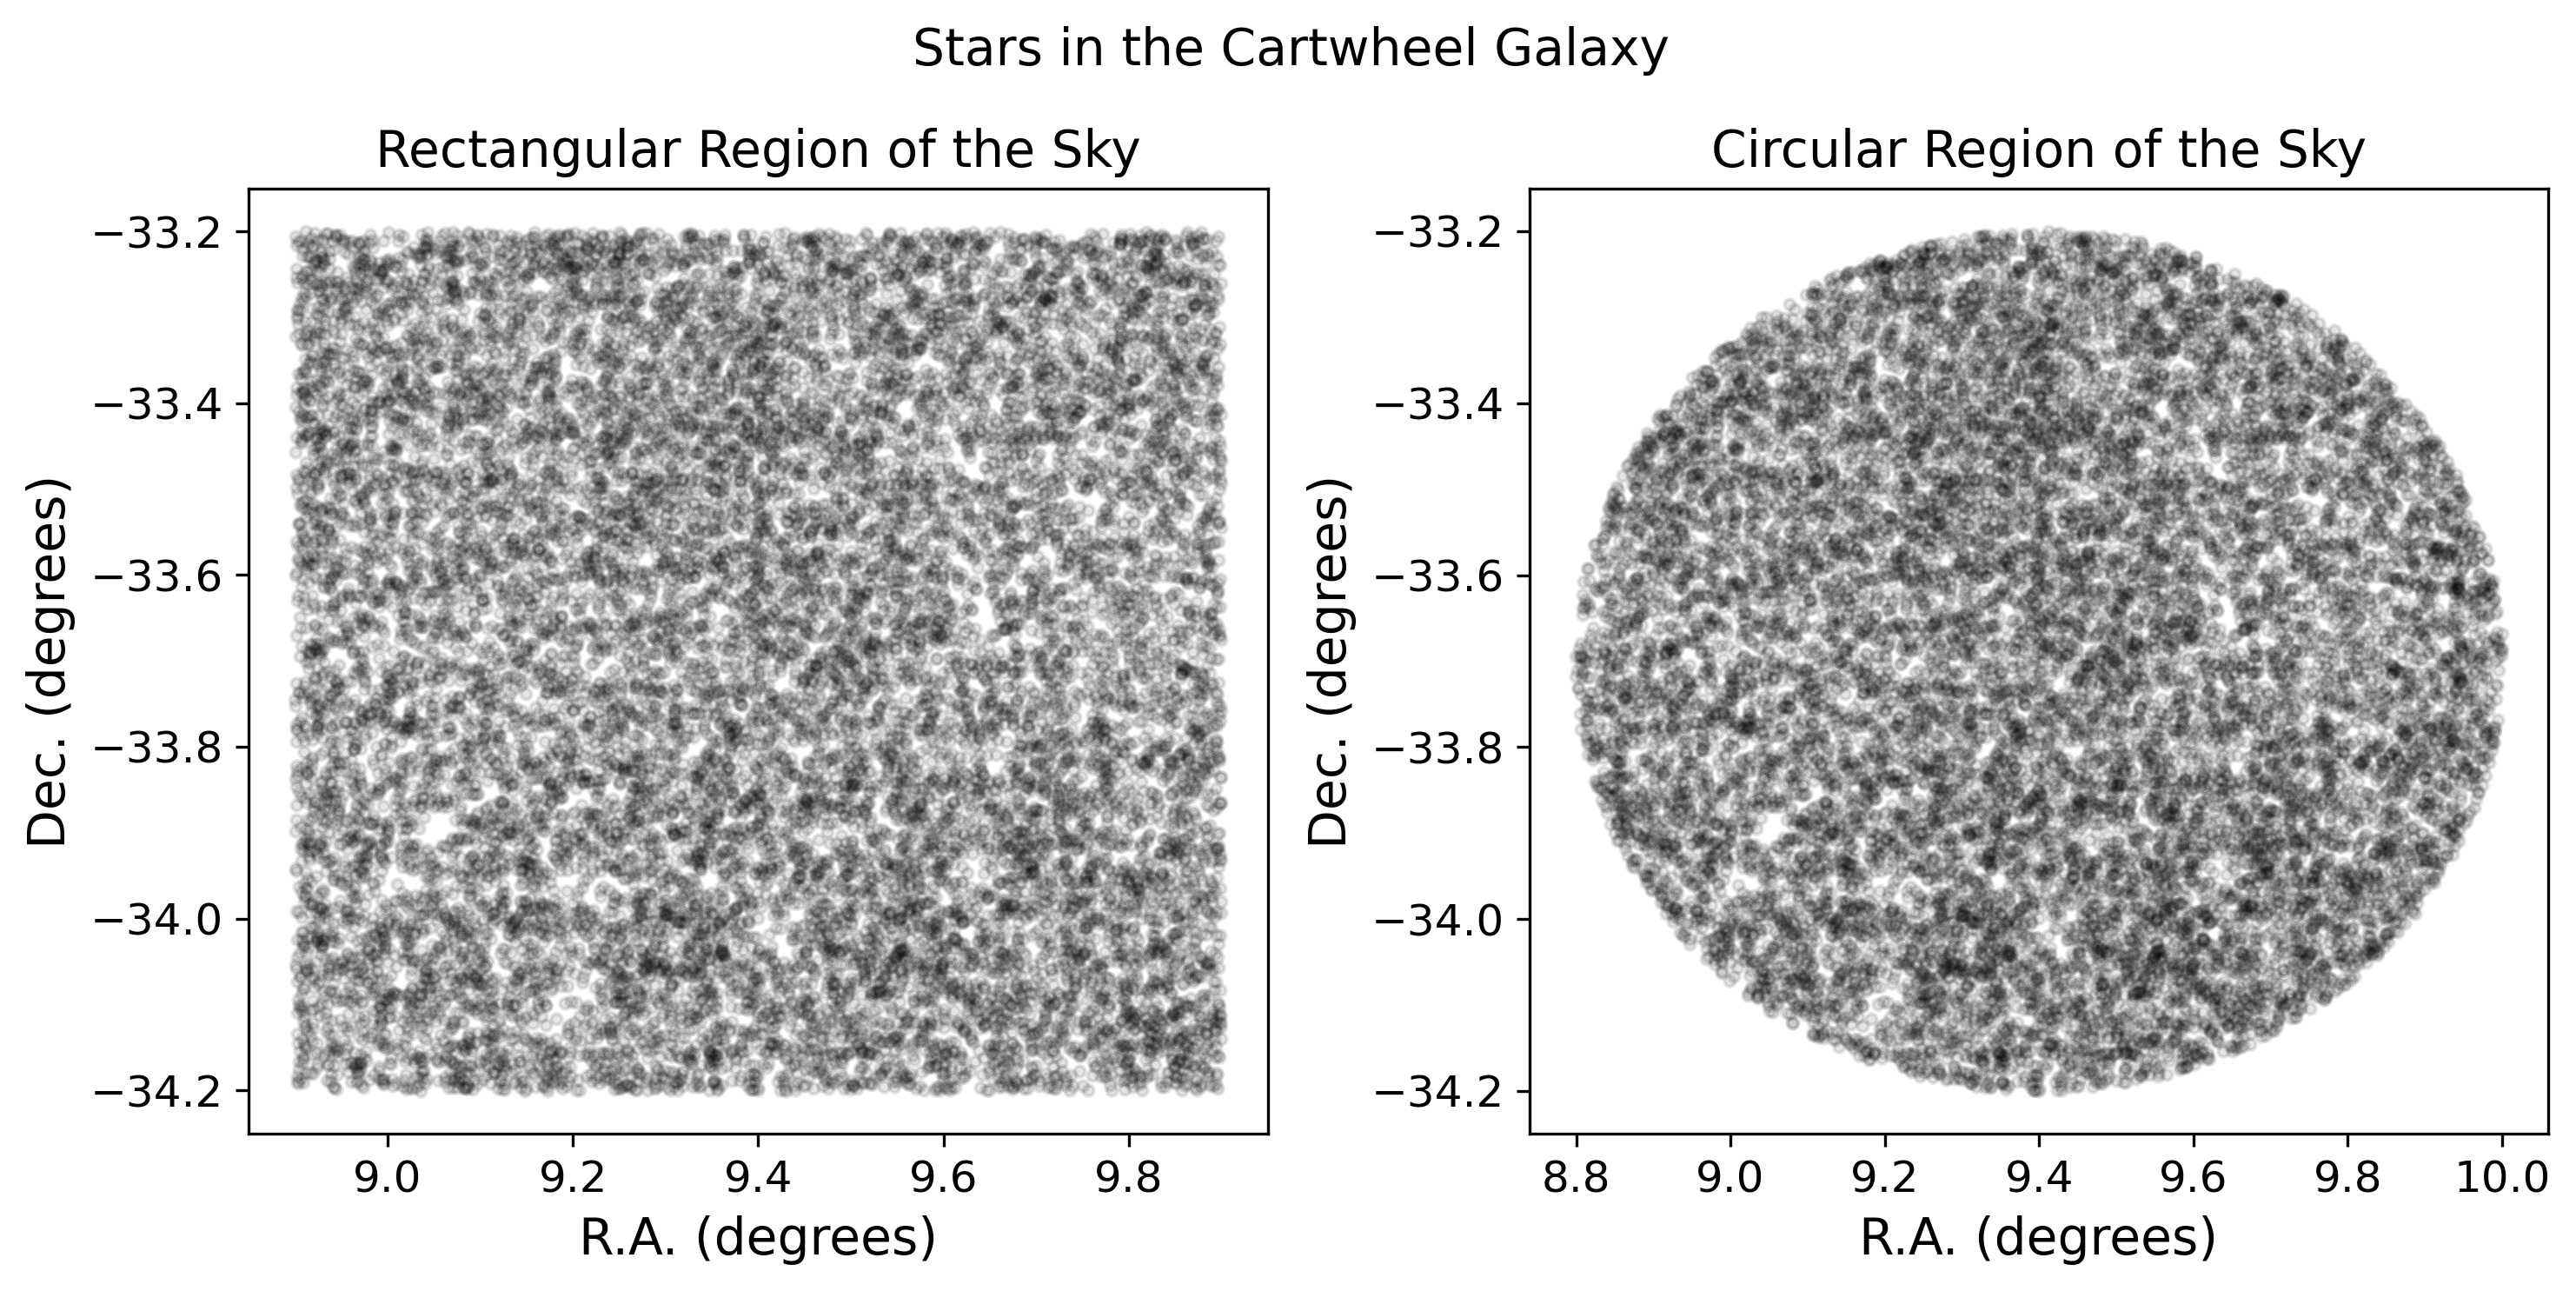

In [36]:
%%time
# Specific command for Jupyter Notebook. Measures the execution time of the code block. At the end of execution, the elapsed time is displayed on the screen.
plt.figure(figsize=[10, 5], dpi=300)  # Creates a figure for the plots with size in inches (10 wide and 5 tall) and resolution of 300 DPI (300 pixels per inch).
plt.suptitle("Stars in the Cartwheel Galaxy", fontsize=14)  # Adds a main title with font size 14.

# First plot (on the left)
plt.subplot(1, 2, 1)  # Divides the figure into a grid of 1 row and 2 columns, and activates the first cell (1) to plot the first graph.
plt.plot(data1.ra, data1.dec, 'k.', alpha=0.1)  # Plots the data from the data1 dataset using the Right Ascension (ra) and Declination (dec) columns. The argument 'k.' defines the stars as black dots, and alpha=0.1 sets the transparency of the dots, making them lighter.
plt.title("Rectangular Region of the Sky", fontsize=14)  # Title of the individual plot.
plt.xlabel("R.A. (degrees)", fontsize=14)  # Sets the x-axis label referring to Right Ascension in degrees, with font size 14.
plt.ylabel("Dec. (degrees)", fontsize=14)  # Sets the y-axis label referring to Declination in degrees, with font size 14.
plt.xticks(fontsize=12)  # Sets the font size for the x-axis tick labels.
plt.yticks(fontsize=12)  # Sets the font size for the y-axis tick labels.

# Second plot (on the right)
plt.subplot(1, 2, 2)  # Activates the second cell (2) of the grid to plot the second graph (of the circular region).
plt.plot(data2.ra, data2.dec, 'k.', alpha=0.1)  # Same process mentioned earlier, but for the circular region dataset.
plt.title("Circular Region of the Sky", fontsize=14)
plt.xlabel("R.A. (degrees)", fontsize=14)
plt.ylabel("Dec. (degrees)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Automatically adjusts the spacing between subplots to avoid overlap.


In these plots, we see a scatter plot of individual points due to the use of `plt.plot`. We observe two distinct visualizations of the distribution of stars in a portion of the sky oriented toward the Cartwheel Galaxy. The denser areas in the plots indicate regions with a higher concentration of stars, while the less dense areas represent regions with fewer stars.


## Density Maps

Used to show clearly the most and least dense areas of the previous plots.


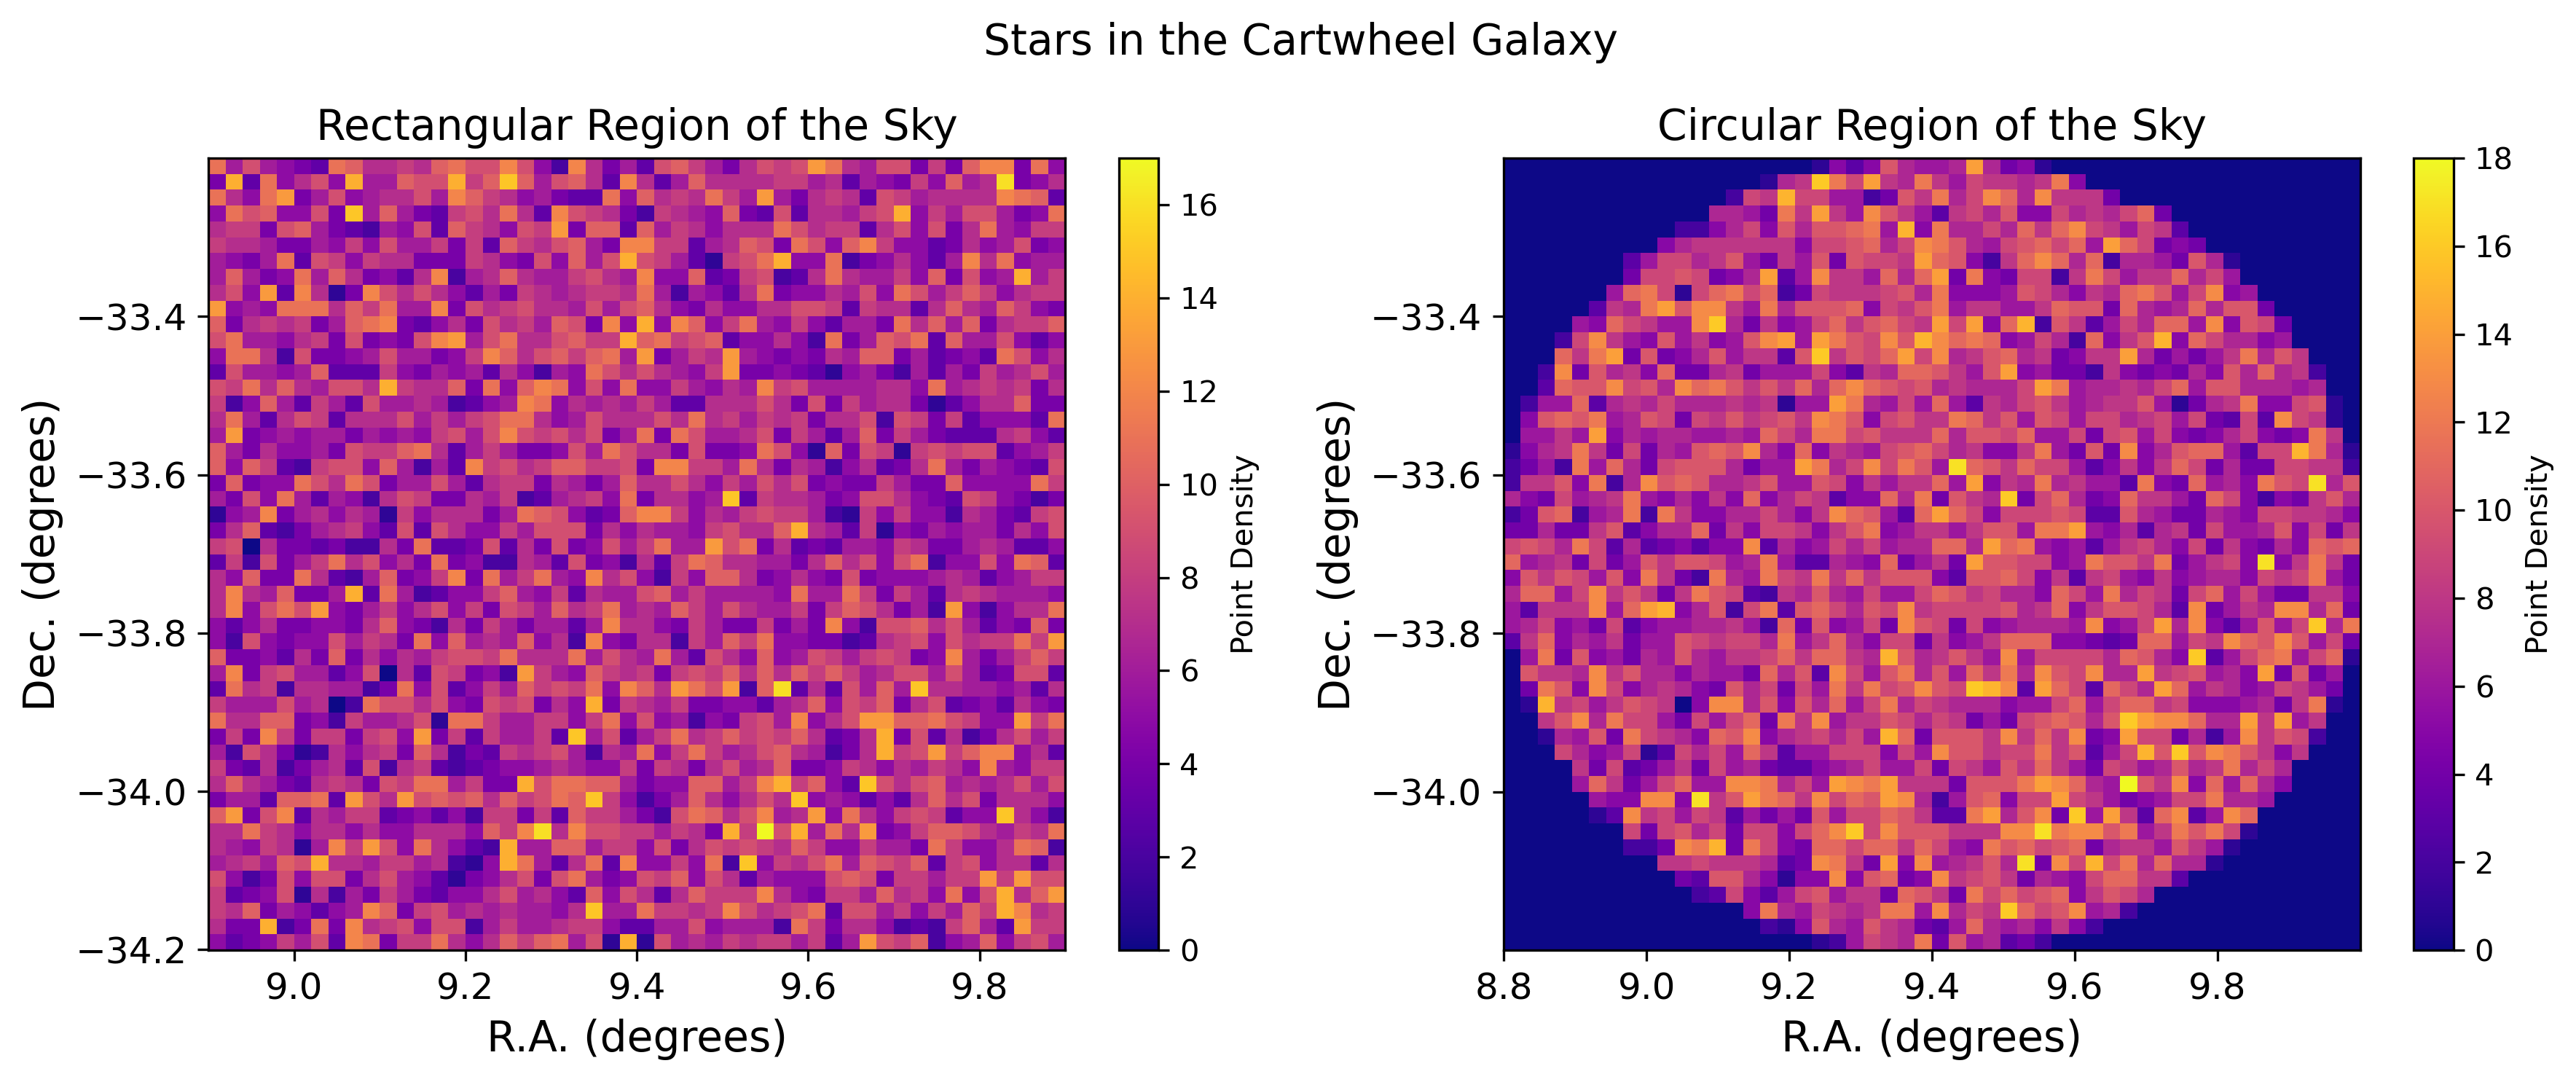

In [37]:
## %%time
plt.figure(figsize=[12, 5], dpi=300)
plt.suptitle("Stars in the Cartwheel Galaxy", fontsize=14)

# First plot (on the left)
plt.subplot(1, 2, 1)
plt.hist2d(data1.ra, data1.dec, bins=50, cmap="plasma")  # Creates a 2D histogram to represent the density of points in two dimensions. The parameter bins=50 divides the plane into a 50x50 grid (bins) to calculate the density of points in each cell, which is colored according to the number of points (stars) it contains, representing density. The parameter cmap="plasma" changes the color map of the plot.
plt.title("Rectangular Region of the Sky", fontsize=14)
plt.xlabel("R.A. (degrees)", fontsize=14)
plt.ylabel("Dec. (degrees)", fontsize=14)
plt.colorbar(label="Point Density")  # Adds a color bar, labeled as Point Density, to the side of the plot to represent the density scale.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Second plot (on the right)
plt.subplot(1, 2, 2)
plt.hist2d(data2.ra, data2.dec, bins=50, cmap="plasma")
plt.title("Circular Region of the Sky", fontsize=14)
plt.xlabel("R.A. (degrees)", fontsize=14)
plt.ylabel("Dec. (degrees)", fontsize=14)
plt.colorbar(label="Point Density")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


In this plot, unlike the previous one, we see a 2D histogram, which groups the data into cells to show the density of points. In this sense, areas with more stars appear brighter or more colorful, while less dense areas (with fewer stars) appear darker or with a different tone.

This characteristic becomes evident when we view the plot alongside the point density color bar. Note that the number of points (stars) increases as the color of the bar transitions from the darker tone to the lighter tone.


In [38]:
# Para ver os nomes das cores disponíveis para o parâmetro cmap dos gráficos de densidade
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

## Gráfico Diagrama Cor-Magnitude (CMD - *Color-Magnitude Diagram*)

The CMD (Color-Magnitude Diagram) is a fundamental tool for studying the physical and evolutionary properties of stars, as it relates the **absolute magnitude** (intrinsic brightness of a star) to its **color** (which indicates its surface temperature).

It is closely related to the Hertzsprung-Russell (H-R) Diagram. The difference between the two lies in the fact that the H-R diagram uses temperature on the horizontal axis of the plot, while the CMD uses color as a *proxy* for temperature.

**Some information the CMD can provide:** Stellar evolution studies, estimation of star ages, estimation of metallicity, and the distribution of stellar populations. For convenience, we will plot the CMD for the dataset of the circular region of the sky.


In [39]:
CMD_data = data2
del data1   # Clearing the dataframes from memory
del data2   # that we will no longer use


In [40]:
CMD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16197 entries, 0 to 16196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coadd_object_id   16197 non-null  int64  
 1   ra                16197 non-null  float64
 2   dec               16197 non-null  float64
 3   flags_g           16197 non-null  int64  
 4   mag_auto_g_dered  16197 non-null  float64
 5   mag_auto_r_dered  16197 non-null  float64
 6   mag_auto_i_dered  16197 non-null  float64
 7   magerr_auto_g     16197 non-null  float64
 8   magerr_auto_r     16197 non-null  float64
 9   magerr_auto_i     16197 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.2 MB


In [41]:
CMD_data.head()

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737


Calculation of the _BP-RP_ color (new column in the **dados** dataframe). The difference between BP (*Blue Photometric*) and RP (*Red Photometric*) [BP-RP] is used to measure the color of a celestial object. It is equivalent to the concept of color magnitude difference (g-r) [g for *green* and r for *red*].


In [42]:
CMD_data["bp_rp"] = dadosCMD.mag_auto_g_dered - dadosCMD.mag_auto_r_dered

In [43]:
CMD_data.head() # Com a inclusão de uma nova coluna referente ao resultado da subtração acima

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i,bp_rp
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732,0.219875
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661,2.995705
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331,0.352980
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239,1.365772
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737,0.110584


In [44]:
CMD_data.head()  # With the inclusion of a new column corresponding to the result of the subtraction above

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i,bp_rp
0,1083232979,9.245211,-34.183172,0,23.839706,23.619831,23.437641,0.077145,0.082664,0.124732,0.219875
1,1083232625,9.250448,-34.179208,0,27.973959,24.978254,25.099403,3.571857,0.298401,0.595661,2.995705
2,1083232493,9.234036,-34.177755,0,24.859114,24.506134,24.411049,0.128408,0.121752,0.199331,0.352980
3,1083232001,9.224144,-34.172271,0,24.293543,22.927771,21.489794,0.129328,0.050474,0.023239,1.365772
4,1083231852,9.224597,-34.170778,0,25.451180,25.340595,24.931129,0.200842,0.237049,0.293737,0.110584


In [45]:
CMD_data.query("flags_g < 4  & mag_auto_g_dered != 99. & mag_auto_r_dered != 99. & mag_auto_i_dered != 99. ", inplace=True)

In [46]:
CMD_data.count()  # Count the number of entries for each column


coadd_object_id     15382
ra                  15382
dec                 15382
flags_g             15382
mag_auto_g_dered    15382
mag_auto_r_dered    15382
mag_auto_i_dered    15382
magerr_auto_g       15382
magerr_auto_r       15382
magerr_auto_i       15382
bp_rp               15382
dtype: int64

In [47]:
CMD_data.describe()  # Statistical summaries and/or insights about the data


,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i,bp_rp
count,1.538200e+04,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000
mean,1.084812e+09,9.404260,-33.702853,0.244247,24.778562,24.027573,23.705732,0.687407,0.277206,0.424013,0.750990
std,2.497189e+06,0.295793,0.253810,0.765935,2.026561,2.032493,2.221546,8.442446,2.054797,1.680280,0.786238
min,1.083204e+09,8.799391,-34.199851,0.000000,15.007527,15.519863,15.538724,0.000227,0.000213,0.000249,-5.849333
25%,1.083284e+09,9.171185,-33.911368,0.000000,24.266434,23.475363,22.824304,0.123480,0.083546,0.086995,0.252305
50%,1.083312e+09,9.404034,-33.707902,0.000000,25.203722,24.702340,24.497443,0.233793,0.192763,0.296327,0.626642
75%,1.088534e+09,9.638802,-33.492845,0.000000,25.888135,25.262853,25.114193,0.410768,0.296788,0.471724,1.252732
max,1.089062e+09,9.999794,-33.200483,3.000000,34.071743,31.958735,31.336166,528.002075,158.809464,158.831360,8.043285


### Plot of CMD Graph

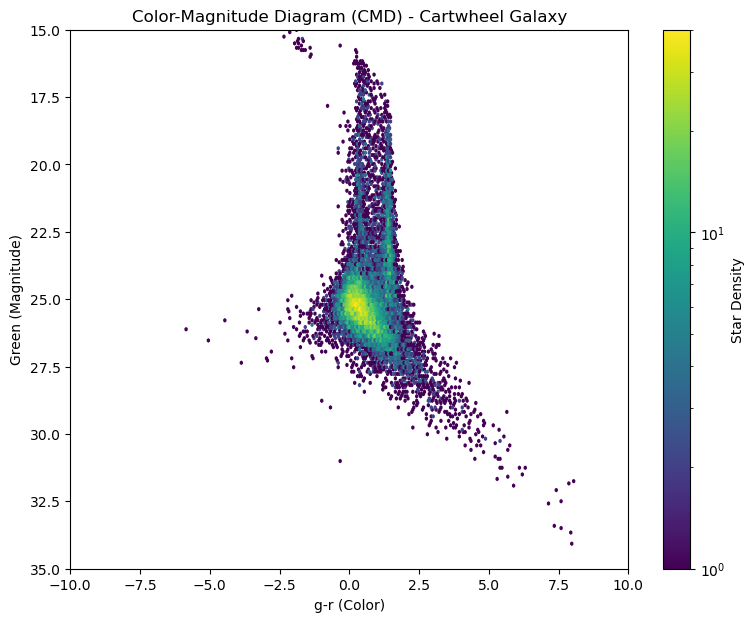

In [49]:
plt.figure(figsize=(9, 7))  # Creates a figure to define the space where the plot will be drawn
plt.hexbin(CMD_data.bp_rp, CMD_data.mag_auto_g_dered, gridsize=200, bins='log')  # Plots a hexagonal density plot, dividing the plot area into hexagonal cells. Adjust gridsize to increase the number of hexagons and, consequently, the resolution of the plot.
plt.gca().invert_yaxis()  # Inverts the y-axis because higher magnitudes (larger numbers) correspond to dimmer stars, while lower magnitudes (smaller numbers) correspond to brighter stars.
plt.xlabel('g-r (Color)')
plt.ylabel('Green (Magnitude)')
plt.title('Color-Magnitude Diagram (CMD) - Cartwheel Galaxy')
#plt.xlim(-0.5, 1.5)
plt.ylim(35, 15)  # Limits the magnitude axis
plt.xlim(-10, 10)  # Limits the color axis
plt.colorbar(label='Star Density')
plt.show()


This plot indicates that in the circular region of the sky oriented toward the Cartwheel Galaxy, we observe a large population of stars with higher temperatures in the g-r range of 0 to 2.
